## Linear regression introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

Specify our own trend line. By setting up the intercept and the slope.

In [2]:
my_intercept = 0.25
my_slope = 1.5

Generate some input values.

In [3]:
# Use np.linspace() to create evenly spaced points

df = pd.DataFrame({'x': np.linspace(-3, 3, num=11)})

In [4]:
df

x
0  -3.0
1  -2.4
2  -1.8
3  -1.2
4  -0.6
5   0.0
6   0.6
7   1.2
8   1.8
9   2.4
10  3.0

Calculate the mean or average trend of the response.

In [5]:
df['mean_trend'] = my_intercept + my_slope * df['x']

In [6]:
df

x  mean_trend
0  -3.0       -4.25
1  -2.4       -3.35
2  -1.8       -2.45
3  -1.2       -1.55
4  -0.6       -0.65
5   0.0        0.25
6   0.6        1.15
7   1.2        2.05
8   1.8        2.95
9   2.4        3.85
10  3.0        4.75

Visualize the mean trend with respect to the input `x`.

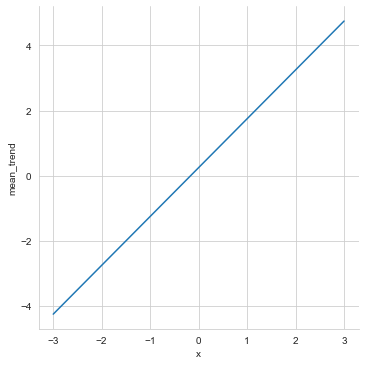

In [7]:
sns.set_style('whitegrid')

sns.relplot(data = df, x='x', y = 'mean_trend', kind='line')

plt.show()

Generate random observations around the mean trend.

In [8]:
### we will first initalize the NumPy random generator

rg = np.random.default_rng(2100)

Specify the amount of noise in our example.

In [9]:
sigma_noise = 1.25

In [10]:
df.shape

(11, 2)

In [11]:
df.shape[0]

11

In [12]:
df['y'] = rg.normal(loc = df.mean_trend.to_numpy(), scale=sigma_noise, size=df.shape[0])

In [13]:
df

x  mean_trend         y
0  -3.0       -4.25 -2.969685
1  -2.4       -3.35 -5.517089
2  -1.8       -2.45 -2.561617
3  -1.2       -1.55 -2.917185
4  -0.6       -0.65 -0.248756
5   0.0        0.25 -1.129007
6   0.6        1.15  0.180008
7   1.2        2.05  1.637903
8   1.8        2.95  1.136718
9   2.4        3.85  5.186360
10  3.0        4.75  4.496986

Visualize the data.

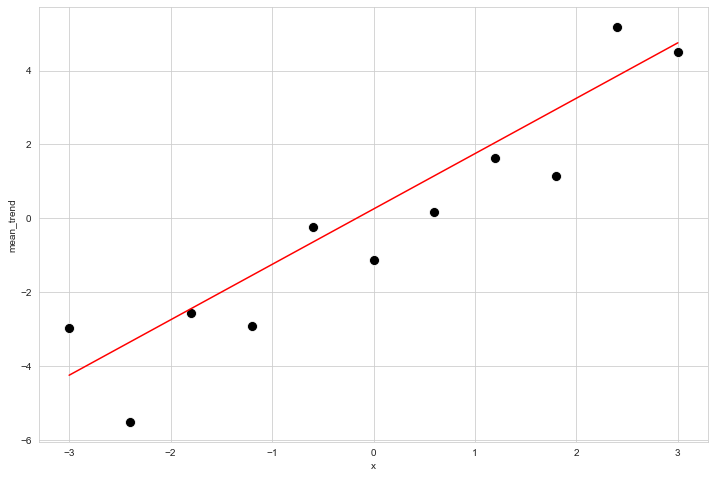

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data = df, x='x', y='mean_trend', color='r')
sns.scatterplot(data = df, x='x', y='y', s=100, color='k')

plt.show()

If we go out and collect data, read data in from a data base, or download data from a CSV file, we will **NEVER** know the true trend.

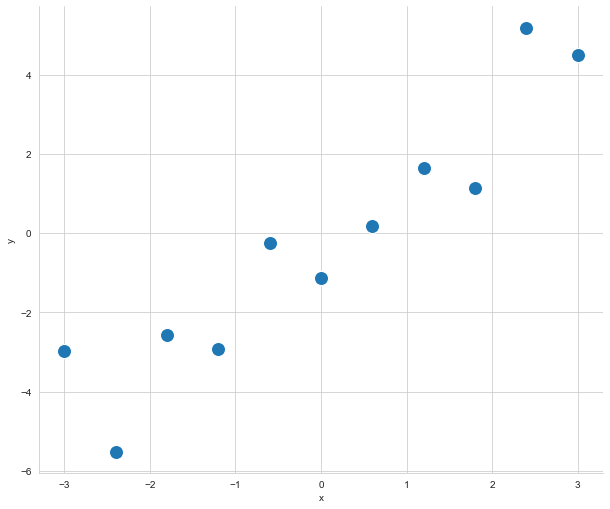

In [16]:
sns.relplot(data = df, x='x', y='y', kind='scatter', height=7, aspect=1.2, s=200)

plt.show()

Repeat generating the random numbers.

In [17]:
df_try = df.copy()

In [18]:
df_try

x  mean_trend         y
0  -3.0       -4.25 -2.969685
1  -2.4       -3.35 -5.517089
2  -1.8       -2.45 -2.561617
3  -1.2       -1.55 -2.917185
4  -0.6       -0.65 -0.248756
5   0.0        0.25 -1.129007
6   0.6        1.15  0.180008
7   1.2        2.05  1.637903
8   1.8        2.95  1.136718
9   2.4        3.85  5.186360
10  3.0        4.75  4.496986

In [19]:
df_try['y1'] = rg.normal(loc = df_try.mean_trend.to_numpy(), scale=sigma_noise, size=df_try.shape[0])
df_try['y2'] = rg.normal(loc = df_try.mean_trend.to_numpy(), scale=sigma_noise, size=df_try.shape[0])
df_try['y3'] = rg.normal(loc = df_try.mean_trend.to_numpy(), scale=sigma_noise, size=df_try.shape[0])
df_try['y4'] = rg.normal(loc = df_try.mean_trend.to_numpy(), scale=sigma_noise, size=df_try.shape[0])
df_try['y5'] = rg.normal(loc = df_try.mean_trend.to_numpy(), scale=sigma_noise, size=df_try.shape[0])

In [20]:
df_try

x  mean_trend         y        y1        y2        y3        y4  \
0  -3.0       -4.25 -2.969685 -5.857502 -4.486696 -5.562908 -4.501993   
1  -2.4       -3.35 -5.517089 -3.590870 -2.867712 -4.146768 -3.256469   
2  -1.8       -2.45 -2.561617 -3.973273 -2.752036 -3.263279 -3.590839   
3  -1.2       -1.55 -2.917185 -1.342254 -1.264094 -0.307621 -3.195713   
4  -0.6       -0.65 -0.248756  0.106164  0.109755 -0.335244  0.120425   
5   0.0        0.25 -1.129007  2.527943 -0.201806  1.945678  0.913213   
6   0.6        1.15  0.180008 -0.143591  2.872201  0.968599  1.192934   
7   1.2        2.05  1.637903  2.979270  3.622299  3.367933  3.753072   
8   1.8        2.95  1.136718  3.294865  4.766032  0.912575  4.126191   
9   2.4        3.85  5.186360  6.072336  2.220709  3.360467  3.426631   
10  3.0        4.75  4.496986  5.883582  5.090341  7.923199  4.876347   

          y5  
0  -4.984038  
1  -3.972573  
2  -4.716662  
3  -0.987644  
4  -0.709826  
5   1.484788  
6   1.310757  
7   3.551503  
8   4.596569  
9   5.190526  
10  5.106608

In [21]:
df_try.rename(columns={'y':'y0'}, inplace=True)

In [22]:
df_try

x  mean_trend        y0        y1        y2        y3        y4  \
0  -3.0       -4.25 -2.969685 -5.857502 -4.486696 -5.562908 -4.501993   
1  -2.4       -3.35 -5.517089 -3.590870 -2.867712 -4.146768 -3.256469   
2  -1.8       -2.45 -2.561617 -3.973273 -2.752036 -3.263279 -3.590839   
3  -1.2       -1.55 -2.917185 -1.342254 -1.264094 -0.307621 -3.195713   
4  -0.6       -0.65 -0.248756  0.106164  0.109755 -0.335244  0.120425   
5   0.0        0.25 -1.129007  2.527943 -0.201806  1.945678  0.913213   
6   0.6        1.15  0.180008 -0.143591  2.872201  0.968599  1.192934   
7   1.2        2.05  1.637903  2.979270  3.622299  3.367933  3.753072   
8   1.8        2.95  1.136718  3.294865  4.766032  0.912575  4.126191   
9   2.4        3.85  5.186360  6.072336  2.220709  3.360467  3.426631   
10  3.0        4.75  4.496986  5.883582  5.090341  7.923199  4.876347   

          y5  
0  -4.984038  
1  -3.972573  
2  -4.716662  
3  -0.987644  
4  -0.709826  
5   1.484788  
6   1.310757  
7   3.551503  
8   4.596569  
9   5.190526  
10  5.106608

Reshape into long-format.

In [23]:
lf = df_try.melt(id_vars=['x', 'mean_trend'], value_vars=['y0', 'y1', 'y2', 'y3', 'y4', 'y5'])

In [24]:
lf

x  mean_trend variable     value
0  -3.0       -4.25       y0 -2.969685
1  -2.4       -3.35       y0 -5.517089
2  -1.8       -2.45       y0 -2.561617
3  -1.2       -1.55       y0 -2.917185
4  -0.6       -0.65       y0 -0.248756
..  ...         ...      ...       ...
61  0.6        1.15       y5  1.310757
62  1.2        2.05       y5  3.551503
63  1.8        2.95       y5  4.596569
64  2.4        3.85       y5  5.190526
65  3.0        4.75       y5  5.106608

[66 rows x 4 columns]

In [25]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           66 non-null     float64
 1   mean_trend  66 non-null     float64
 2   variable    66 non-null     object 
 3   value       66 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.2+ KB


In [26]:
lf['variable'] = lf.variable.astype('category')

Visualize the 6 different sets of random numbers.

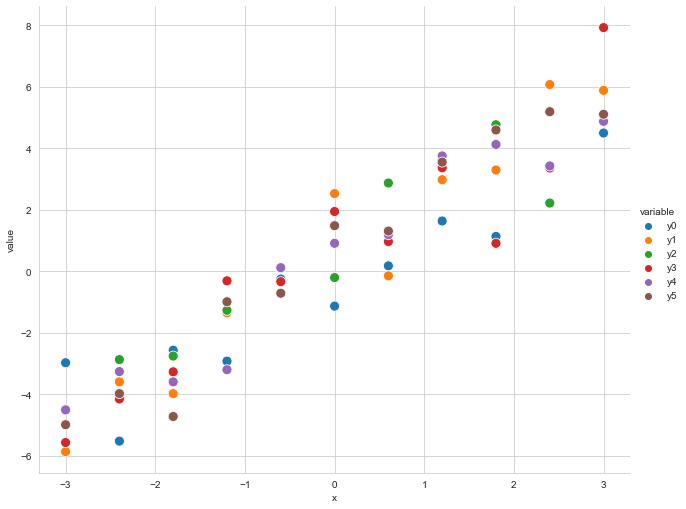

In [29]:
sns.relplot(data = lf, x='x', y='value', kind='scatter', hue='variable', height=7, aspect=1.25, s=100)

plt.show()

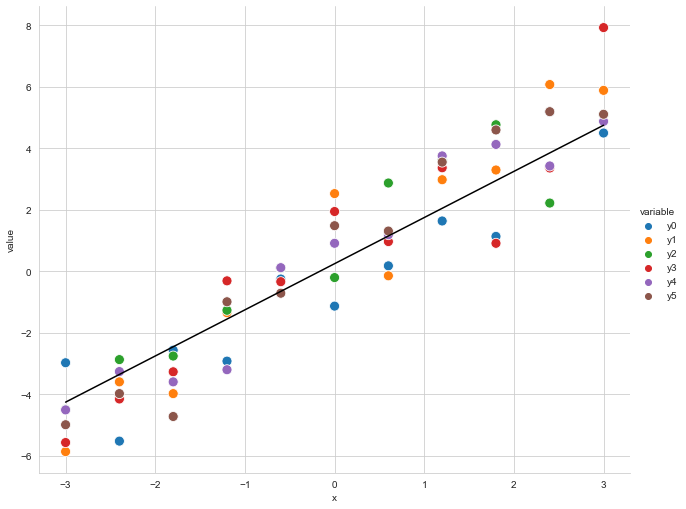

In [31]:
sns.relplot(data = lf, x='x', y='value', kind='scatter', hue='variable', height=7, aspect=1.25, s=100)

sns.lineplot(data = df, x='x', y='mean_trend', color='k',legend=False)

plt.show()

Let's use `sns.lmplot()` to draw a best fit line to the data.

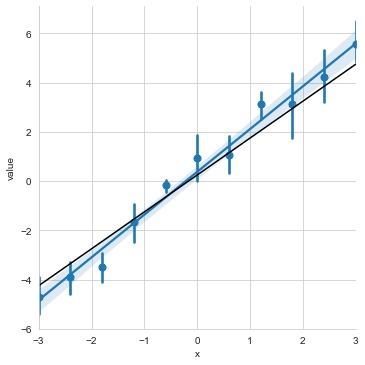

In [33]:
sns.lmplot(data = lf, x='x', y='value', x_estimator=np.mean)

sns.lineplot(data = df, x='x', y='mean_trend', color='k')

plt.show()

In [35]:
lf.groupby('x')['value'].mean()

x
-3.0   -4.727137
-2.4   -3.891914
-1.8   -3.476285
-1.2   -1.669085
-0.6   -0.159580
 0.0    0.923468
 0.6    1.063485
 1.2    3.151997
 1.8    3.138825
 2.4    4.242838
 3.0    5.562844
Name: value, dtype: float64

In [36]:
lf.groupby('x')['value'].aggregate(['mean', 'sem'])

mean       sem
x                       
-3.0 -4.727137  0.417907
-2.4 -3.891914  0.376654
-1.8 -3.476285  0.326863
-1.2 -1.669085  0.464655
-0.6 -0.159580  0.137009
 0.0  0.923468  0.560159
 0.6  1.063485  0.431892
 1.2  3.151997  0.322026
 1.8  3.138825  0.700873
 2.4  4.242838  0.596355
 3.0  5.562844  0.507047

In [37]:
lf.groupby('x')['value'].aggregate(['mean', 'std', 'sem'])

mean       std       sem
x                                 
-3.0 -4.727137  1.023658  0.417907
-2.4 -3.891914  0.922611  0.376654
-1.8 -3.476285  0.800647  0.326863
-1.2 -1.669085  1.138168  0.464655
-0.6 -0.159580  0.335602  0.137009
 0.0  0.923468  1.372103  0.560159
 0.6  1.063485  1.057915  0.431892
 1.2  3.151997  0.788799  0.322026
 1.8  3.138825  1.716781  0.700873
 2.4  4.242838  1.460766  0.596355
 3.0  5.562844  1.242006  0.507047

In [42]:
np.sqrt( lf.groupby('x')['value'].var().mean() )

1.136021157725395

In [43]:
sigma_noise

1.25

## How do we fit models?

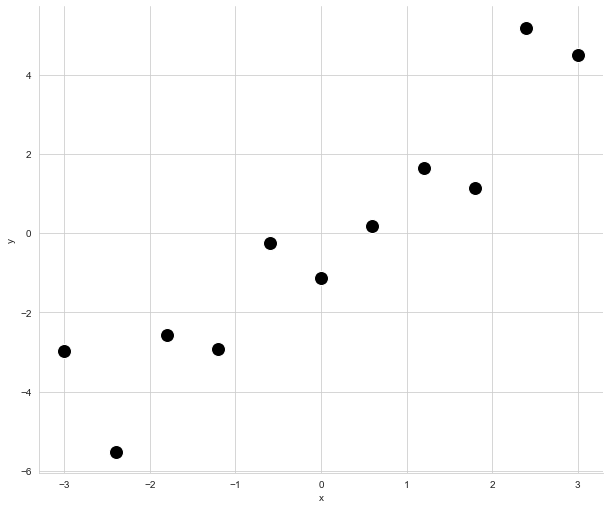

In [44]:
sns.relplot(data = df, x='x', y='y', kind='scatter', color='k', height=7, aspect=1.2, s=200)

plt.show()

In [45]:
b1_guess_0 = 1
b0_guess_0 = 0

In [46]:
df_guess = df.copy()

In [47]:
df_guess['trend_guess_0'] = b0_guess_0 + b1_guess_0 * df_guess['x']

In [48]:
df_guess

x  mean_trend         y  trend_guess_0
0  -3.0       -4.25 -2.969685           -3.0
1  -2.4       -3.35 -5.517089           -2.4
2  -1.8       -2.45 -2.561617           -1.8
3  -1.2       -1.55 -2.917185           -1.2
4  -0.6       -0.65 -0.248756           -0.6
5   0.0        0.25 -1.129007            0.0
6   0.6        1.15  0.180008            0.6
7   1.2        2.05  1.637903            1.2
8   1.8        2.95  1.136718            1.8
9   2.4        3.85  5.186360            2.4
10  3.0        4.75  4.496986            3.0

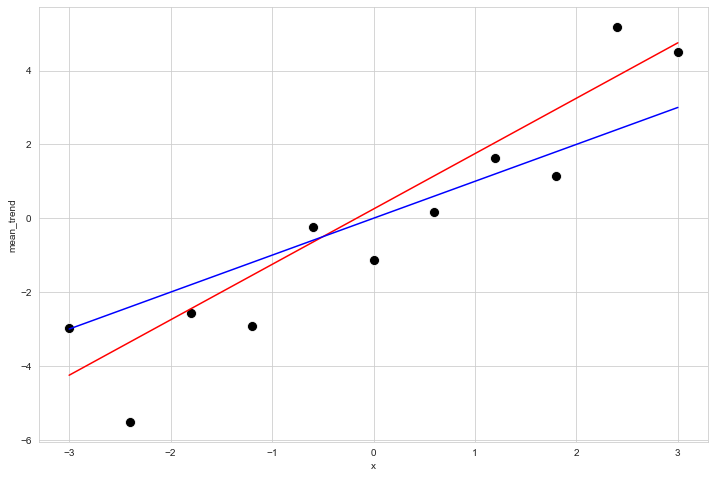

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data = df_guess, x='x', y='mean_trend', color='r')
sns.lineplot(data = df_guess, x='x', y='trend_guess_0', color='b')
sns.scatterplot(data=df_guess, x='x', y='y', s=100, color ='k')

plt.show()

What would happen if I tried a different slope?

In [51]:
b1_guess_1 = 3
b0_guess_1 = 0

In [52]:
df_guess['trend_guess_1'] = b0_guess_1 + b1_guess_1 * df_guess['x']

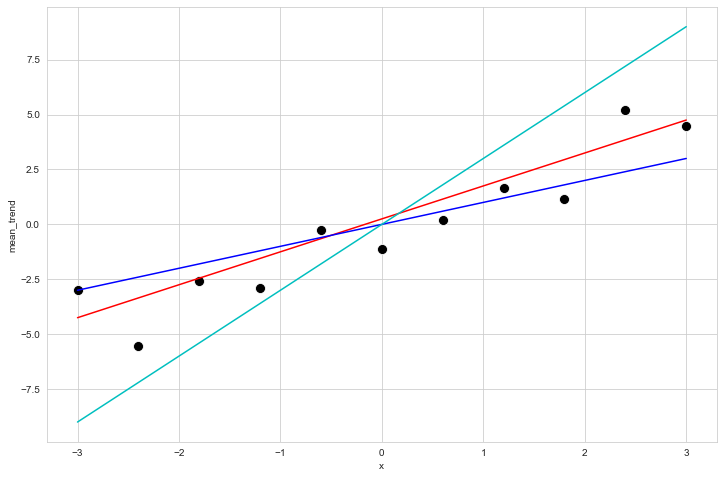

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data = df_guess, x='x', y='mean_trend', color='r')
sns.lineplot(data = df_guess, x='x', y='trend_guess_0', color='b')
sns.lineplot(data = df_guess, x='x', y='trend_guess_1', color='c')
sns.scatterplot(data=df_guess, x='x', y='y', s=100, color ='k')

plt.show()

In [54]:
b1_guess_2 = -2
b0_guess_2 = 0

df_guess['trend_guess_2'] = b0_guess_2 + b1_guess_2 * df_guess['x']

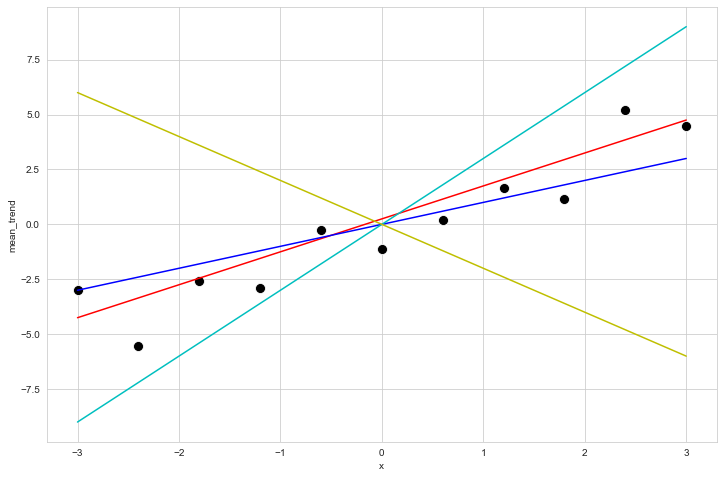

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data = df_guess, x='x', y='mean_trend', color='r')
sns.lineplot(data = df_guess, x='x', y='trend_guess_0', color='b')
sns.lineplot(data = df_guess, x='x', y='trend_guess_1', color='c')
sns.lineplot(data = df_guess, x='x', y='trend_guess_2', color ='y')
sns.scatterplot(data=df_guess, x='x', y='y', s=100, color ='k')

plt.show()

In [56]:
b1_guess_3 = 1
b0_guess_3 = -3

df_guess['trend_guess_3'] = b0_guess_3 + b1_guess_3 * df_guess['x']

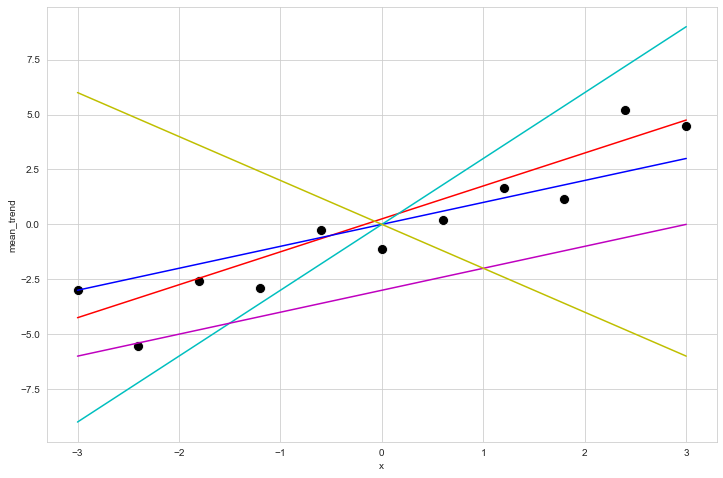

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data = df_guess, x='x', y='mean_trend', color='r')
sns.lineplot(data = df_guess, x='x', y='trend_guess_0', color='b')
sns.lineplot(data = df_guess, x='x', y='trend_guess_1', color='c')
sns.lineplot(data = df_guess, x='x', y='trend_guess_3', color='m')
sns.lineplot(data = df_guess, x='x', y='trend_guess_2', color ='y')
sns.scatterplot(data=df_guess, x='x', y='y', s=100, color ='k')

plt.show()

### How can we pick a best line?

In [58]:
np.linspace(-3, 3, num=11)

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [59]:
intercept_values = np.linspace(-3, 3, num=11)

slope_values = np.linspace(-3, 3, num=11)

In [60]:
intercept_values.ndim

1

In [61]:
intercept_values.shape

(11,)

Using a nested for loop to create a grid of intercept and slope values.

In [62]:
b_grid_loop = []

for b0use in intercept_values:
    for b1use in slope_values:
        b_grid_loop.append((b0use, b1use))

In [63]:
len( b_grid_loop )

121

In [65]:
b_grid_df = pd.DataFrame(b_grid_loop, columns=['b0', 'b1'])

In [66]:
b_grid_df

b0   b1
0   -3.0 -3.0
1   -3.0 -2.4
2   -3.0 -1.8
3   -3.0 -1.2
4   -3.0 -0.6
..   ...  ...
116  3.0  0.6
117  3.0  1.2
118  3.0  1.8
119  3.0  2.4
120  3.0  3.0

[121 rows x 2 columns]

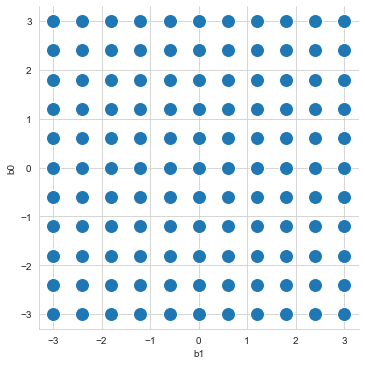

In [67]:
sns.relplot(data = b_grid_df, x='b1', y='b0', kind='scatter', s=200)

plt.show()

Calculate the mean trend for each combination of the intercept and slope.

In [68]:
def calculate_trend_df(b0, b1, x):
    res = pd.DataFrame({'x': x})
    res['mean_trend'] = b0 + b1 * res.x
    res['b0'] = b0
    res['b1'] = b1
    
    return res

In [69]:
calculate_trend_df(0, 1, df.x)

x  mean_trend  b0  b1
0  -3.0        -3.0   0   1
1  -2.4        -2.4   0   1
2  -1.8        -1.8   0   1
3  -1.2        -1.2   0   1
4  -0.6        -0.6   0   1
5   0.0         0.0   0   1
6   0.6         0.6   0   1
7   1.2         1.2   0   1
8   1.8         1.8   0   1
9   2.4         2.4   0   1
10  3.0         3.0   0   1

Apply our function to every intercept and slope combination.

In [71]:
# intialize a list to store every dataframe

trend_results = []

for ix in b_grid_df.index:
    trend_results.append(calculate_trend_df(b_grid_df.iloc[ix].b0, b_grid_df.iloc[ix].b1, df.x))

In [72]:
len( trend_results )

121

In [73]:
type( trend_results )

list

In [74]:
type( trend_results[0] )

pandas.core.frame.DataFrame

In [75]:
# concat all dataframes together into a single large data frame

trend_study_df = pd.concat(trend_results)

In [76]:
trend_study_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           1331 non-null   float64
 1   mean_trend  1331 non-null   float64
 2   b0          1331 non-null   float64
 3   b1          1331 non-null   float64
dtypes: float64(4)
memory usage: 52.0 KB


In [77]:
trend_study_df

x  mean_trend   b0   b1
0  -3.0         6.0 -3.0 -3.0
1  -2.4         4.2 -3.0 -3.0
2  -1.8         2.4 -3.0 -3.0
3  -1.2         0.6 -3.0 -3.0
4  -0.6        -1.2 -3.0 -3.0
..  ...         ...  ...  ...
6   0.6         4.8  3.0  3.0
7   1.2         6.6  3.0  3.0
8   1.8         8.4  3.0  3.0
9   2.4        10.2  3.0  3.0
10  3.0        12.0  3.0  3.0

[1331 rows x 4 columns]

Visualize the behavior of all of the guesses with seaborn.

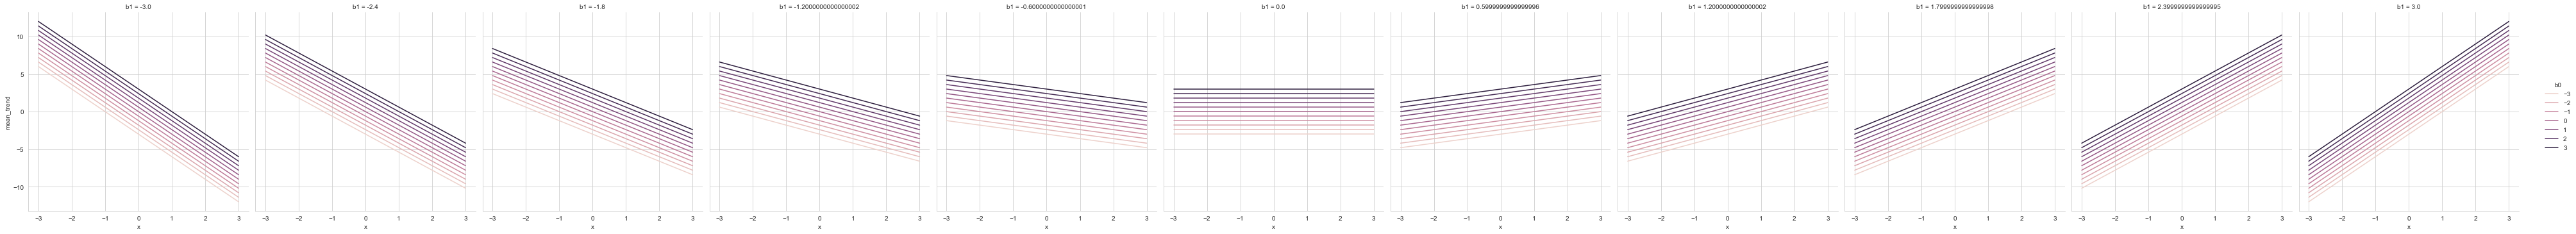

In [82]:
sns.relplot(data = trend_study_df, x ='x', y='mean_trend', kind='line', estimator=None,
           hue='b0', col='b1')

plt.show()

In [80]:
trend_study_df.nunique()

x              11
mean_trend    414
b0             11
b1             11
dtype: int64

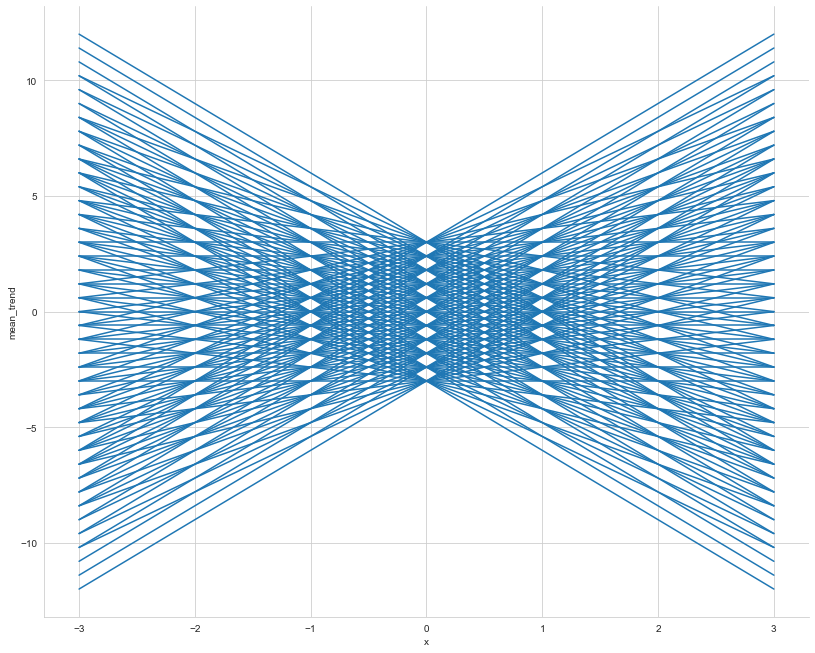

In [83]:
sns.relplot(data = trend_study_df, x='x', y='mean_trend', kind='line',
           estimator=None,
           units=trend_study_df.b0.astype('str')+trend_study_df.b1.astype('str'),
           height = 9, aspect=1.25)

plt.show()

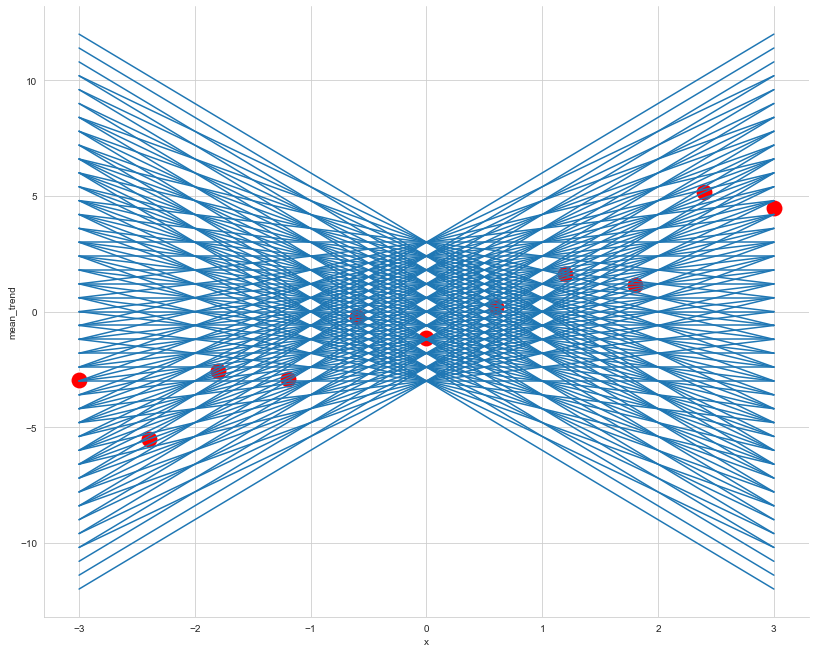

In [84]:
sns.relplot(data = trend_study_df, x='x', y='mean_trend', kind='line',
           estimator=None,
           units=trend_study_df.b0.astype('str')+trend_study_df.b1.astype('str'),
           height = 9, aspect=1.25)

sns.scatterplot(data = df, x='x', y='y', s=300, color='r', legend=False)

plt.show()

Calculate the error.

In [86]:
trend_study_df_b = pd.merge(trend_study_df, df.loc[:, ['x', 'y']].copy(), on=['x'])

In [88]:
trend_study_df_b

x  mean_trend   b0   b1         y
0    -3.0         6.0 -3.0 -3.0 -2.969685
1    -3.0         4.2 -3.0 -2.4 -2.969685
2    -3.0         2.4 -3.0 -1.8 -2.969685
3    -3.0         0.6 -3.0 -1.2 -2.969685
4    -3.0        -1.2 -3.0 -0.6 -2.969685
...   ...         ...  ...  ...       ...
1326  3.0         4.8  3.0  0.6  4.496986
1327  3.0         6.6  3.0  1.2  4.496986
1328  3.0         8.4  3.0  1.8  4.496986
1329  3.0        10.2  3.0  2.4  4.496986
1330  3.0        12.0  3.0  3.0  4.496986

[1331 rows x 5 columns]

In [89]:
trend_study_df_b['error'] = trend_study_df_b['y'] - trend_study_df_b['mean_trend']

In [90]:
trend_study_df_b

x  mean_trend   b0   b1         y     error
0    -3.0         6.0 -3.0 -3.0 -2.969685 -8.969685
1    -3.0         4.2 -3.0 -2.4 -2.969685 -7.169685
2    -3.0         2.4 -3.0 -1.8 -2.969685 -5.369685
3    -3.0         0.6 -3.0 -1.2 -2.969685 -3.569685
4    -3.0        -1.2 -3.0 -0.6 -2.969685 -1.769685
...   ...         ...  ...  ...       ...       ...
1326  3.0         4.8  3.0  0.6  4.496986 -0.303014
1327  3.0         6.6  3.0  1.2  4.496986 -2.103014
1328  3.0         8.4  3.0  1.8  4.496986 -3.903014
1329  3.0        10.2  3.0  2.4  4.496986 -5.703014
1330  3.0        12.0  3.0  3.0  4.496986 -7.503014

[1331 rows x 6 columns]

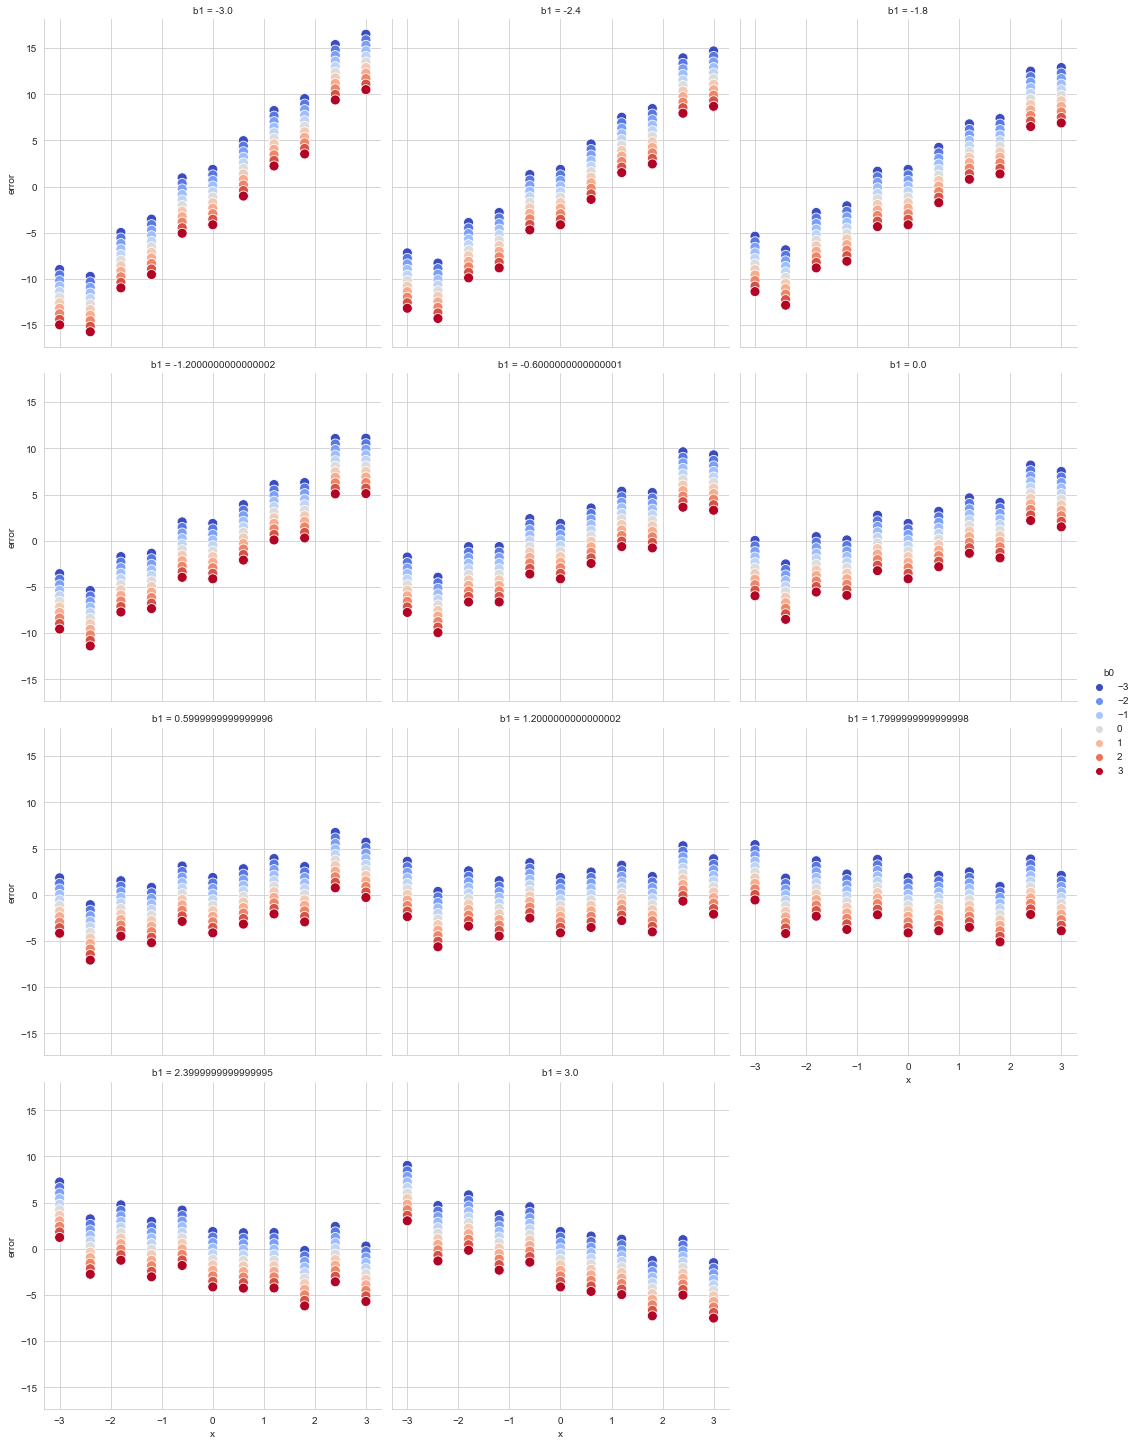

In [91]:
sns.relplot(data = trend_study_df_b, x='x', y='error', kind='scatter',
           hue='b0', palette='coolwarm', s=100,
           col='b1', col_wrap=3)

plt.show()

In [92]:
trend_study_df_b['squared_error'] = trend_study_df_b['error'] ** 2

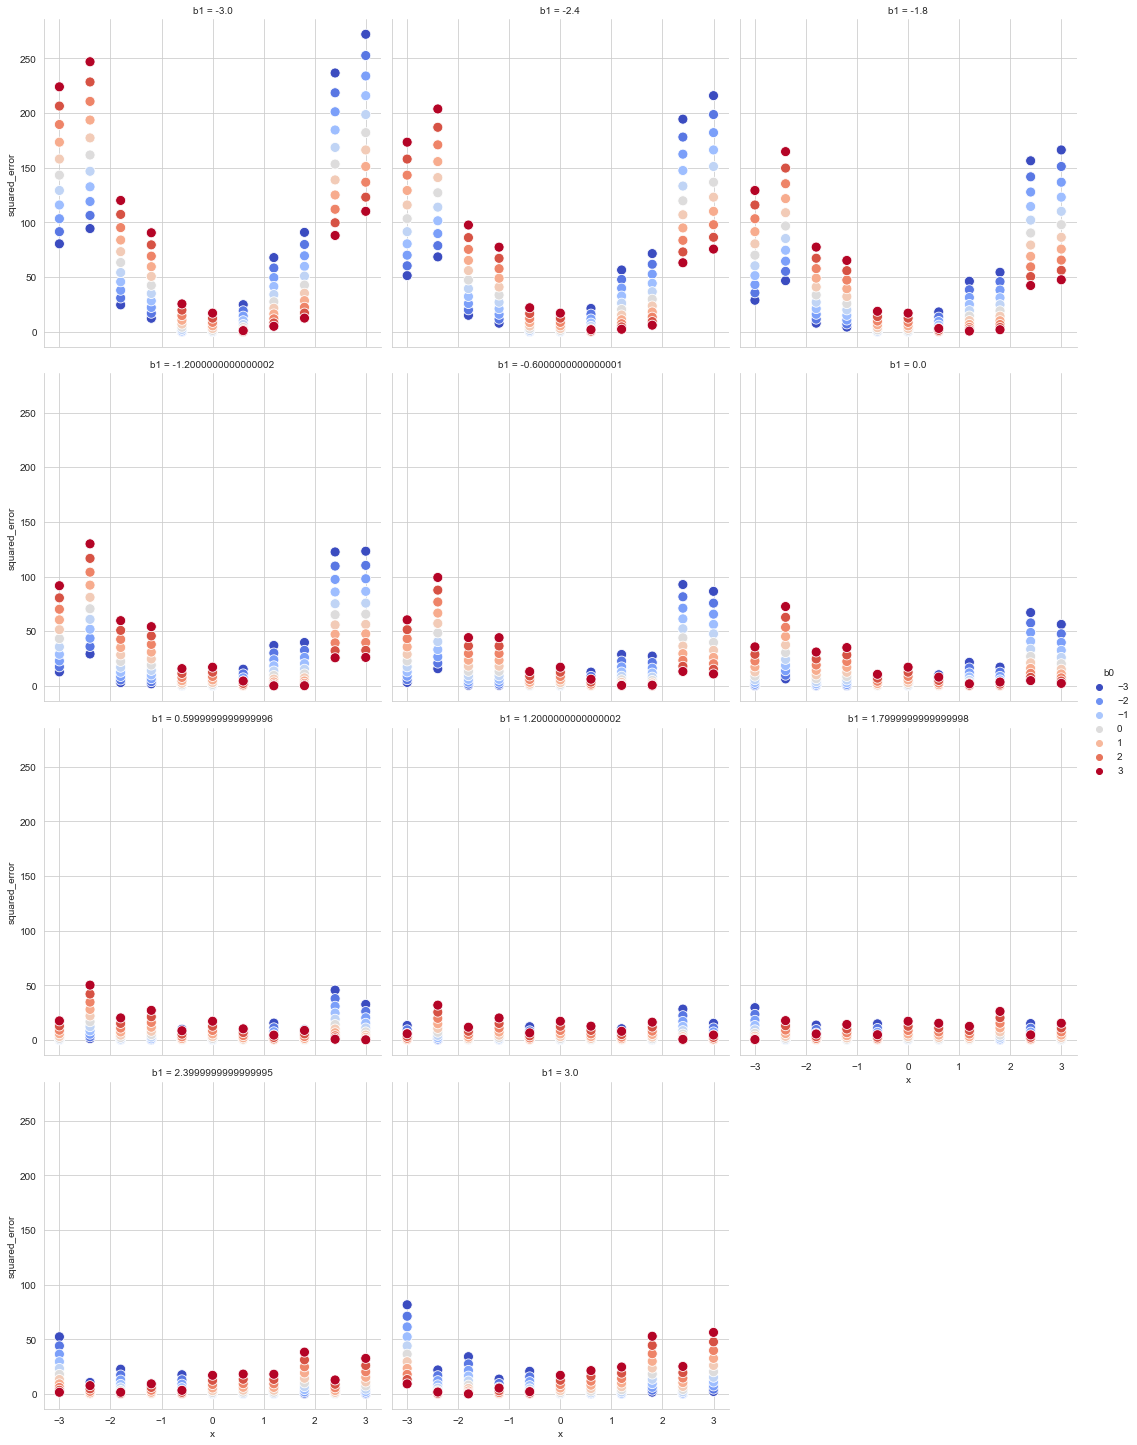

In [93]:
sns.relplot(data = trend_study_df_b, x='x', y='squared_error', kind='scatter',
           hue='b0', palette='coolwarm', s=100,
           col='b1', col_wrap=3)

plt.show()

Summarize the squared error.

In [94]:
trend_study_df_b.groupby(['b0', 'b1']).squared_error.sum().reset_index()

b0   b1  squared_error
0   -3.0 -3.0     908.773902
1   -3.0 -2.4     707.907515
2   -3.0 -1.8     535.553128
3   -3.0 -1.2     391.710741
4   -3.0 -0.6     276.380354
..   ...  ...            ...
116  3.0  0.6     163.719943
117  3.0  1.2     133.925556
118  3.0  1.8     132.643169
119  3.0  2.4     159.872782
120  3.0  3.0     215.614395

[121 rows x 3 columns]

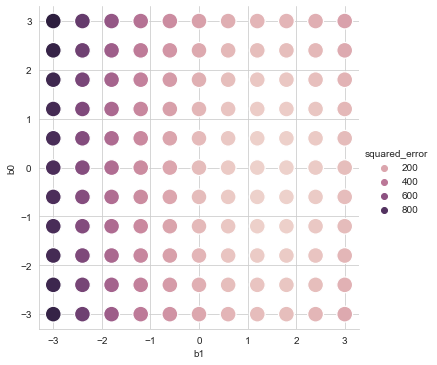

In [95]:
sns.relplot(data = trend_study_df_b.groupby(['b0', 'b1']).squared_error.sum().reset_index(),
           x='b1', y='b0', hue='squared_error', s=250)

plt.show()

In [96]:
trend_study_df_b.groupby(['b0', 'b1']).squared_error.sum().reset_index().sort_values(by=['squared_error'])

b0   b1  squared_error
63   0.0  1.8      17.410987
52  -0.6  1.8      18.124551
62   0.0  1.2      18.693374
51  -0.6  1.2      19.406938
74   0.6  1.8      24.617424
..   ...  ...            ...
88   1.8 -3.0     871.385392
11  -2.4 -3.0     876.380338
99   2.4 -3.0     902.351828
0   -3.0 -3.0     908.773902
110  3.0 -3.0     941.238265

[121 rows x 3 columns]

In [103]:
sort_trend_study = trend_study_df_b.groupby(['b0', 'b1']).squared_error.sum().\
reset_index().\
sort_values(by=['squared_error']).\
reset_index()

In [104]:
sort_trend_study['combo_rank'] = pd.Series(np.arange(len(sort_trend_study)) + 1, index=sort_trend_study.index)

In [105]:
sort_trend_study

index   b0   b1  squared_error  combo_rank
0       63  0.0  1.8      17.410987           1
1       52 -0.6  1.8      18.124551           2
2       62  0.0  1.2      18.693374           3
3       51 -0.6  1.2      19.406938           4
4       74  0.6  1.8      24.617424           5
..     ...  ...  ...            ...         ...
116     88  1.8 -3.0     871.385392         117
117     11 -2.4 -3.0     876.380338         118
118     99  2.4 -3.0     902.351828         119
119      0 -3.0 -3.0     908.773902         120
120    110  3.0 -3.0     941.238265         121

[121 rows x 5 columns]

In [106]:
sort_trend_study['top_10'] = np.where(sort_trend_study.combo_rank <=10, 'best', 'others')

In [107]:
sort_trend_study

index   b0   b1  squared_error  combo_rank  top_10
0       63  0.0  1.8      17.410987           1    best
1       52 -0.6  1.8      18.124551           2    best
2       62  0.0  1.2      18.693374           3    best
3       51 -0.6  1.2      19.406938           4    best
4       74  0.6  1.8      24.617424           5    best
..     ...  ...  ...            ...         ...     ...
116     88  1.8 -3.0     871.385392         117  others
117     11 -2.4 -3.0     876.380338         118  others
118     99  2.4 -3.0     902.351828         119  others
119      0 -3.0 -3.0     908.773902         120  others
120    110  3.0 -3.0     941.238265         121  others

[121 rows x 6 columns]

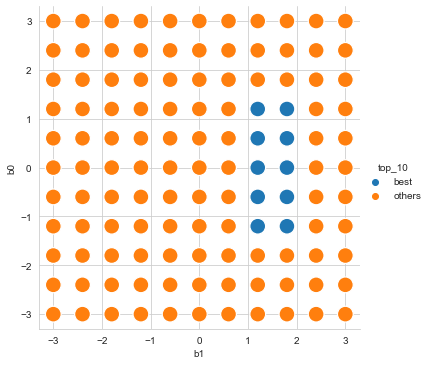

In [109]:
sns.relplot(data = sort_trend_study, x='b1', y='b0', hue='top_10', s=250)

plt.show()

In [110]:
best_sort_trend_study = sort_trend_study.loc[ sort_trend_study.combo_rank <= 10, : ].copy()

In [113]:
best_lines_to_show = pd.merge(trend_study_df, best_sort_trend_study.loc[:, ['b0', 'b1', 'combo_rank']].copy(), 
                             on=['b0', 'b1'])

In [115]:
best_lines_to_show

x  mean_trend   b0   b1  combo_rank
0   -3.0       -4.80 -1.2  1.2           8
1   -2.4       -4.08 -1.2  1.2           8
2   -1.8       -3.36 -1.2  1.2           8
3   -1.2       -2.64 -1.2  1.2           8
4   -0.6       -1.92 -1.2  1.2           8
..   ...         ...  ...  ...         ...
105  0.6        2.28  1.2  1.8           9
106  1.2        3.36  1.2  1.8           9
107  1.8        4.44  1.2  1.8           9
108  2.4        5.52  1.2  1.8           9
109  3.0        6.60  1.2  1.8           9

[110 rows x 5 columns]

Look at the best models and compare to the data.

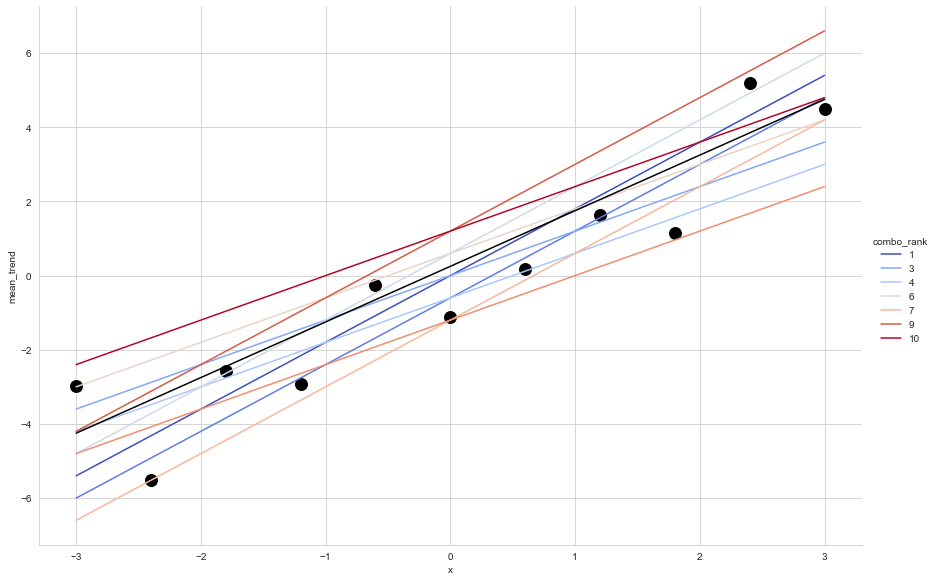

In [117]:
sns.relplot(data = best_lines_to_show, x='x', y='mean_trend', kind='line', hue='combo_rank',
           palette='coolwarm',
           estimator=None,
           units=best_lines_to_show.b0.astype('str')+best_lines_to_show.b1.astype('str'),
           height=8, aspect=1.5)

sns.lineplot(data = df, x='x', y='mean_trend', color = 'k', legend=False)

sns.scatterplot(data = df, x='x', y='y', s=200, color = 'k', legend=False)

plt.show()

What if we tried out even more combinations?

In [118]:
many_intercepts = np.linspace(-3, 3, num=51)

many_slopes = np.linspace(-3, 3, num=51)

In [119]:
big_grid_df = pd.DataFrame([(x0, x1) for x0 in many_intercepts for x1 in many_slopes], columns=['b0', 'b1'])

In [120]:
big_grid_df.shape

(2601, 2)

In [122]:
trend_results = []

for ix in big_grid_df.index:
    trend_results.append(calculate_trend_df(big_grid_df.iloc[ix].b0, big_grid_df.iloc[ix].b1, df.x))

In [123]:
big_study_df = pd.concat(trend_results)

In [124]:
big_study_df

x  mean_trend   b0   b1
0  -3.0         6.0 -3.0 -3.0
1  -2.4         4.2 -3.0 -3.0
2  -1.8         2.4 -3.0 -3.0
3  -1.2         0.6 -3.0 -3.0
4  -0.6        -1.2 -3.0 -3.0
..  ...         ...  ...  ...
6   0.6         4.8  3.0  3.0
7   1.2         6.6  3.0  3.0
8   1.8         8.4  3.0  3.0
9   2.4        10.2  3.0  3.0
10  3.0        12.0  3.0  3.0

[28611 rows x 4 columns]

In [125]:
big_study_df_b = pd.merge(big_study_df, df.loc[:, ['x', 'y']].copy(), on=['x'])

In [126]:
big_study_df_b['squared_error'] = (big_study_df_b['y'] - big_study_df_b['mean_trend']) ** 2

In [127]:
big_study_summary = big_study_df_b.groupby(['b0', 'b1']).\
aggregate(SSE = ('squared_error', 'sum'),
         MSE = ('squared_error', 'mean')).\
reset_index()

In [128]:
big_study_summary['RMSE'] = np.sqrt( big_study_summary['MSE'] )

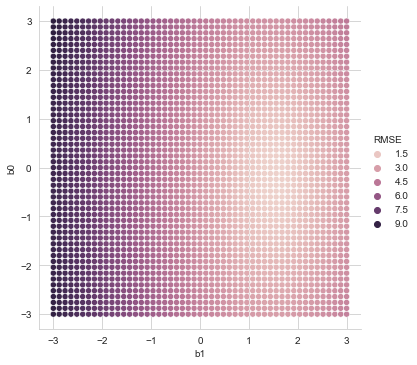

In [129]:
sns.relplot(data = big_study_summary, x='b1', y='b0', hue='RMSE')

plt.show()

In [130]:
sigma_noise

1.25

In [131]:
big_study_summary.describe()

b0            b1          SSE          MSE         RMSE
count  2.601000e+03  2.601000e+03  2601.000000  2601.000000  2601.000000
mean  -4.370890e-17 -1.707379e-18   264.666148    24.060559     4.390892
std    1.766692e+00  1.766692e+00   242.663903    22.060355     2.186884
min   -3.000000e+00 -3.000000e+00    13.837528     1.257957     1.121587
25%   -1.560000e+00 -1.560000e+00    75.820389     6.892763     2.625407
50%    0.000000e+00  0.000000e+00   155.463740    14.133067     3.759397
75%    1.560000e+00  1.560000e+00   421.244985    38.294999     6.188295
max    3.000000e+00  3.000000e+00   941.238265    85.567115     9.250249

In [132]:
big_study_summary['rmse_bin'] = pd.cut(big_study_summary.RMSE,
                                      [big_study_summary.RMSE.min(), 2, 3, 6, big_study_summary.RMSE.max()],
                                      include_lowest=True)

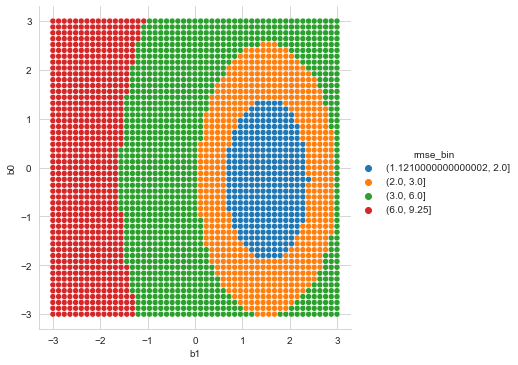

In [133]:
sns.relplot(data = big_study_summary, x='b1', y='b0', hue='rmse_bin')

plt.show()

In [134]:
big_study_final = pd.merge(big_study_df, big_study_summary.loc[:, ['b0', 'b1', 'rmse_bin']].copy(), on=['b0', 'b1'])

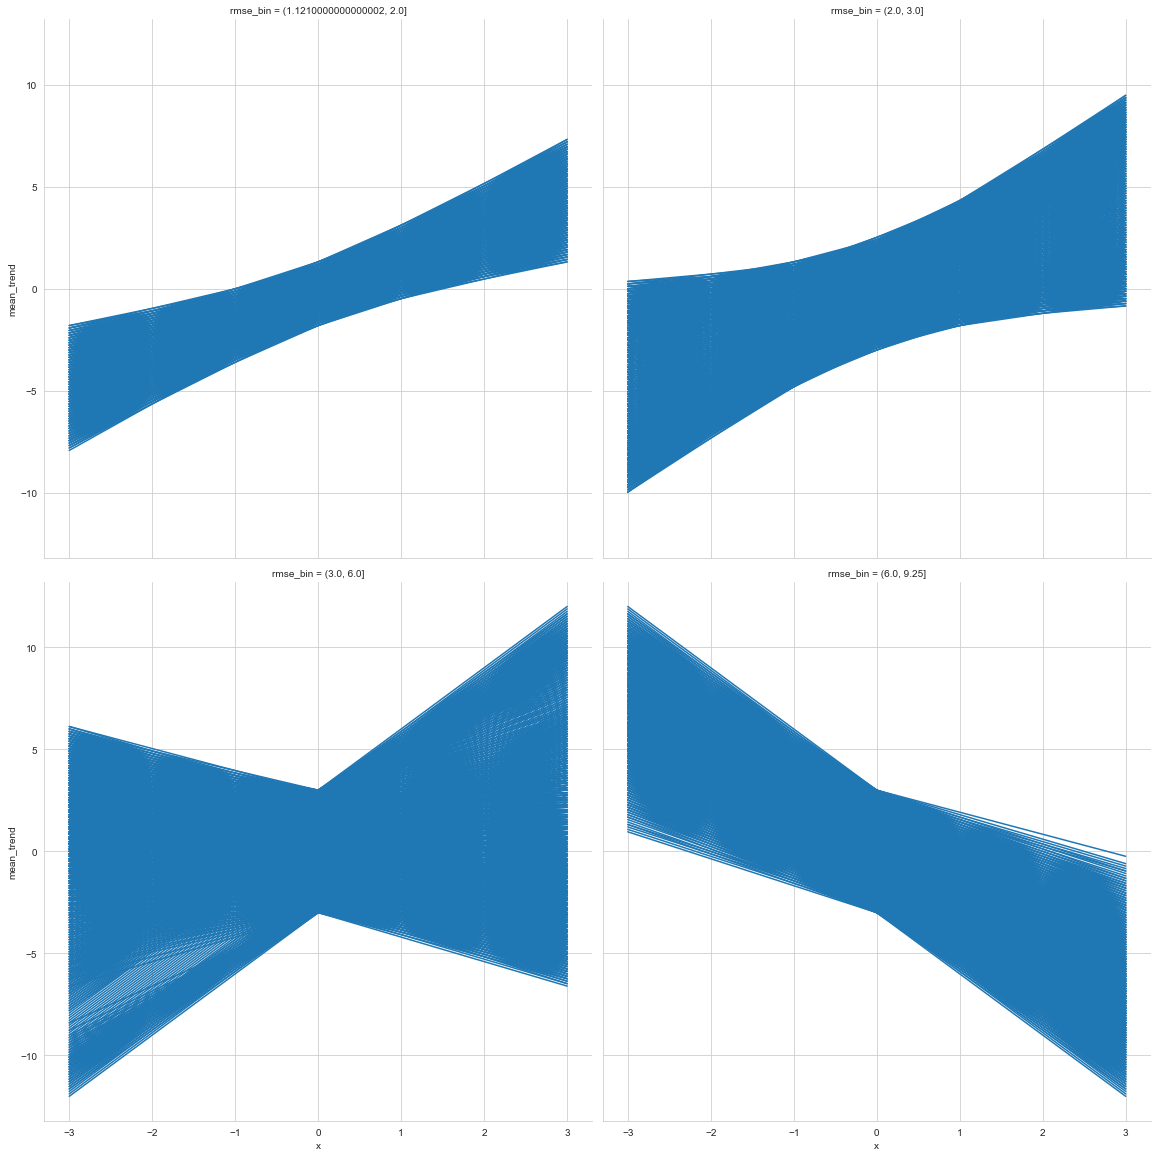

In [136]:
sns.relplot(data = big_study_final,
          x='x', y='mean_trend', kind='line', col='rmse_bin', col_wrap=2,
          estimator=None, 
          units=big_study_final.b0.astype('str')+big_study_final.b1.astype('str'),
          height=8)

plt.show()

## Fit with built in functions

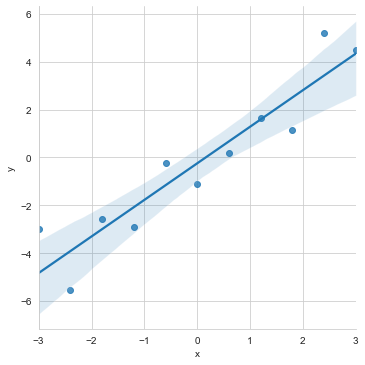

In [137]:
sns.lmplot(data = df, x='x', y='y')

plt.show()

https://www.statsmodels.org/stable/index.html

In [138]:
import statsmodels.formula.api as smf

In [139]:
my_first_model = smf.ols(formula = 'y ~ x', data = df)

In [140]:
my_model_fit = my_first_model.fit()

In [141]:
print( my_model_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     60.24
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.82e-05
Time:                        20:56:03   Log-Likelihood:                -16.853
No. Observations:                  11   AIC:                             37.71
Df Residuals:                       9   BIC:                             38.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2459      0.373     -0.659      0.5

C:\Users\XPS15\Anaconda3\envs\cmpinf2100\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [143]:
print( my_model_fit.params )

Intercept   -0.245942
x            1.526986
dtype: float64


In [144]:
print( my_model_fit.bse )

Intercept    0.373274
x            0.196732
dtype: float64


In [145]:
print( my_model_fit.conf_int() )

                  0         1
Intercept -1.090346  0.598461
x          1.081947  1.972026
